<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="400"></img></center>  
<br><br>
<center><h1><font color="#64a644">Understand poverty to optimize microloans</font></h1></center>
<br><br>


### <a id="0"></a><font color="#64a444">Content</font>
* <a href="#1" style="text-decoration:none"><font color="#64a444">Introduction</font></a>
* <a href="#2" style="text-decoration:none"><font color="#64a444">Prepare analysis</font></a>
* <a href="#3" style="text-decoration:none"><font color="#64a444">Who are the borrowers?</font></a>
* <a href="#4" style="text-decoration:none"><font color="#64a444">Multidimensional Poverty Index (MPI) distribution</font></a>
    * <a href="#41" style="text-decoration:none"><font color="#64a444">A World Map on poverty</font></a>
    * <a href="#42" style="text-decoration:none"><font color="#64a444">Aggregated MPI per coutries and world regions</font></a>
* <a href="#5" style="text-decoration:none"><font color="#64a444">How poverty correlates with loans distribution</font></a>
* <a href="#6" style="text-decoration:none"><font color="#64a444">Looking to poverty from more than one angle</font></a>
* <a href="#7" style="text-decoration:none"><font color="#64a444">How Kiva can improve?</font></a>
* <a href="#8" style="text-decoration:none"><font color="#64a444">Final remarks</font></a>
* <a href="#9" style="text-decoration:none"><font color="#64a444">References</font></a>



# <a id="1"></a><font color="#64a444">Introduction</font>  


[Kiva.org](https://www.kiva.org) is an online crowdfunding platform dedicated to extend financial services to poor people around the World.

Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans. In a separate notebook we explored the data provided by Kiva in the competition dataset. We looked to loans distribution (number of loans and amount, grouped by country, region, sector, activity, currency). We also looked to the field partners, which collaborate locally with Kiva to distribute the loans. We analyzed as well loan themes, correlated with geography.

In this Notebook we will focus on understanding the poverty and how Kiva answers, with its microloans, to the diversity of needs.
 

# <a id="2"></a><font color="#64a444">Prepare analysis</font>  


## <font color="#64a444">Load packages</font>  

We will use, besides the usual `numpy` and `pandas` Python libraries, `plotly` for data visualization.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import folium
init_notebook_mode(connected=True)

In [2]:
from plot_style_utils import set_color_map

---

<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Load the data</font>   

We will load two datasets:   
* Kiva's own dataset, [Data Science for Good: Kiva Crowdfunding](https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding);  
* [Country Statistics - UNData](https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles), contributed by [SRK](https://www.kaggle.com/sudalairajkumar)

In [3]:
kiva_loans_df = pd.read_csv("/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
kiva_mpi_region_locations_df = pd.read_csv("/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")

In [4]:
country_profile_variables_df = pd.read_csv("/kaggle/input/undata-country-profiles/country_profile_variables.csv")
kiva_country_profiles_variables_df = pd.read_csv("/kaggle/input/undata-country-profiles/kiva_country_profile_variables.csv")

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <font color="#64a444">Notebook color theme</font>   


Notebook Color Schema:


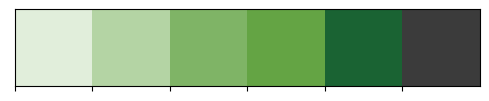

In [5]:
color_list = ["#e1eedb", "#b4d4a4", "#7fb466", "#64a444","#1a6333", "#3b3b3b"]
cmap_custom = set_color_map(color_list)

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="3"></a><font color="#64a444">Who are the borrowers</font>  

For a loan can be more than one borrower. They can be all females, all males or both males and females. Let’s calculate the number of female and male borrowers for each loan. 

In [6]:
def get_gender_count(text,gen="female"):
    count = 0
    try:
        text = text.split(",")
        for t in text:
            if gen == t.rstrip().lstrip():
                count+=1
    except:
        return count
        
    return count
kiva_loans_df["n_male"] = kiva_loans_df["borrower_genders"].apply(lambda x: get_gender_count(x, "male"))
kiva_loans_df["n_female"] = kiva_loans_df["borrower_genders"].apply(lambda x: get_gender_count(x, "female"))

In [7]:
Markdown("""There are totally **{}** female borrowers and only **{}** male borrowers. The maximum number of female borrowers for a loan is  **{}** 
and the maximum number of male borrowers for a loan is **{}**.<br>   
Let’s calculate the number of loans with only female borrowers, with only male borrowers, with both male and female and not specified. 
This is not the number of borrowers, but of loans with different type of borrowers.
""".format(kiva_loans_df["n_female"].sum(),  
        kiva_loans_df["n_male"].sum(), 
        kiva_loans_df["n_female"].max(), 
       kiva_loans_df["n_male"].max()))

There are totally **1071308** female borrowers and only **274904** male borrowers. The maximum number of female borrowers for a loan is  **50** 
and the maximum number of male borrowers for a loan is **44**.<br>   
Let’s calculate the number of loans with only female borrowers, with only male borrowers, with both male and female and not specified. 
This is not the number of borrowers, but of loans with different type of borrowers.


In [8]:
kiva_loans_df["borrower_gen"] = "Not specified"
kiva_loans_df.loc[(kiva_loans_df.n_male !=0) & (kiva_loans_df.n_female ==0), "borrower_gen"] = "Male"
kiva_loans_df.loc[(kiva_loans_df.n_male ==0) & (kiva_loans_df.n_female !=0), "borrower_gen"] = "Female"
kiva_loans_df.loc[(kiva_loans_df.n_male !=0) & (kiva_loans_df.n_female !=0), "borrower_gen"] = "Female & Male"

df = kiva_loans_df.groupby("borrower_gen")["loan_amount"].count().reset_index()
df.columns = ["Borrower Gender", "Number of loans"]
df.sort_values(by="Number of loans", ascending=False)
trace = go.Bar(
    x = df["Borrower Gender"],y = df['Number of loans'],
    marker=dict(
                color=color_list[3],
                line=dict(
                    color=color_list[5],
                    width=1),
                opacity=0.9,
            ),
)
data = [trace]
    
layout = dict(title = 'Loans per borrower gender',
          xaxis = dict(title = 'Borrower genders', showticklabels=True), 
          yaxis = dict(title = 'Loans'),
          hovermode = 'closest',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='borrower-genders')


Majority of loans are with female-only borrowers, then, on second place, the loans with male-only borrowers.  
Let’s see the distribution of female and male borrowers. First, let’s see the average numbers of female and male borrowers per Sector. We will only consider the loans where at least one female borrower is present or at least one male borrower is present in calculation of the average value.

In [9]:
df = kiva_loans_df.loc[kiva_loans_df.n_female>0]
df = df.groupby(["sector"])["n_female"].agg(["count", "mean", "max"]).reset_index()
df = df.sort_values(by="mean", ascending=False)
sectors_f = go.Bar(
        x = df['sector'],
        y = df['mean'],
        name="Female borrowers",
        marker=dict(color=color_list[4]))
df2 = kiva_loans_df.loc[kiva_loans_df.n_male>0]
df2 = df2.groupby(["sector"])["n_male"].agg(["count", "mean", "max"]).reset_index()
df2 = df2.sort_values(by="mean", ascending=False)
sectors_m = go.Bar(
        x = df2['sector'],
        y = df2['mean'],
        name="Male borrowers",
        marker=dict(color=color_list[3]))
fig = make_subplots(rows=1, cols=2, start_cell="top-left",
                   subplot_titles=("Loans with at least one female borrower", 
                                   "Loans with at least one male borrower"))

fig.add_trace(sectors_f, row=1, col=1)
fig.add_trace(sectors_m, row=1, col=2)
layout = go.Layout(height=400, width=900, title="Average number of female/male borowers/loan")
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()

The average number of female borrowers/loan is 2.7 for Clothing sector, 2.6 for Personal Use and 2.4 for Food, with very close to 2 for Agriculture and Constructions.

The average number of male borrowers/loan is very close to 1.75 for Food, Agriculture, Clothing and Personal Use.

Let’s represent now the maximum number of male and female borrowers per loan.

In [10]:
df = df.sort_values(by="max", ascending=False)
sectors_f = go.Bar(
        x = df['sector'],
        y = df['max'],
        name="Female borrowers",
        marker=dict(color=color_list[4]))
df2 = df2.sort_values(by="max", ascending=False)
sectors_m = go.Bar(
        x = df2['sector'],
        y = df2['max'],
        name="Male borrowers",
        marker=dict(color=color_list[3]))
fig = make_subplots(rows=1, cols=2, start_cell="top-left",
                   subplot_titles=("Loans with at least one female borrower", 
                                   "Loans with at least one male borrower"))

fig.add_trace(sectors_f, row=1, col=1)
fig.add_trace(sectors_m, row=1, col=2)
layout = go.Layout(height=400, width=900, title="Maximum number of female/male borowers/loan")
fig.update_layout(layout)
fig.update_layout(showlegend=False)
fig.show()

The maximum number of female borrowers are for Clothing, Food and Retail. For male borrowers, Personal Use and Agriculture have the maximum numbers of borrowes.

Let’s check as well the loan repayment interval, grouped on female only, male only and mix gender borrowers. We also group by repayment interval (monthly, irregular, weekly, bullet).

In [11]:
data = []
repayment_interval = kiva_loans_df.repayment_interval.unique()
cl =[2, 1, 4, 5]
for i, ry in enumerate(repayment_interval):
    df = kiva_loans_df.loc[kiva_loans_df.repayment_interval==ry]
    df = df.groupby("borrower_gen")["loan_amount"].count().reset_index()
    df.columns = ["Borrower gender", "Number of loans"]
    trace = go.Bar(
        x = df['Borrower gender'],y = df['Number of loans'],
        name=ry,
        marker=dict(
                    color=color_list[cl[i]],
                    line=dict(
                        color=color_list[cl[i]],
                        width=1),
                    opacity=0.9,
                ),
    )
    data.append(trace)
    
layout = dict(title = 'Loans per borrower gender and repayment interval',
          xaxis = dict(title = 'Borrower gender', showticklabels=True), 
          yaxis = dict(title = 'Number of loans'),
          hovermode = 'closest',
          barmode='stack',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='sector-repayment-interval')

We can observe that Female only borrowers groups have almost the same amount of loans with monthly and irregular repayment interval, only a small percent of the loans being paid back in one installment (bullet). The Male only borrowers groups have the majority of repayments of monthly type and a much more percent of bullet repayment type than irregular. Bullet type is most probably characteristic to cyclic activities, like agriculture, when revenue is scarce and repayment is possible only at harvest time (or when harvest is paid).

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="4"></a><font color="#64a444">Multidimensional Poverty Index (MPI) regions locations</font>  

We will represent the Kiva regions locations using a leaflet map. We will first remove the wrong (latitude, longitude) tuples and we will remove as well the wrong MPI values. Each region will be represented with a circle centered in the geographical position of the MPI. Circle color is proportional with value of MPI (from red assigned to maximum value of MPI to green assigned to minimum value of MPI).

## <a id="41"></a><font color="#64a444">A World Map on poverty</font>  

In [12]:
region_df = kiva_mpi_region_locations_df.loc[~(kiva_mpi_region_locations_df.MPI.isna()) |
                                             (kiva_mpi_region_locations_df.lat>90) |
                                             (kiva_mpi_region_locations_df.lat <-90) |
                                             (kiva_mpi_region_locations_df.lon<-180) |
                                             (kiva_mpi_region_locations_df.lon>180)]
region_df = region_df.loc[~region_df.lat.isna() & ~region_df.lon.isna()]

In [13]:
# map with entire World
m = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB Positron")

for _, r in region_df.iterrows():
    folium.CircleMarker(location=[r['lat'], r['lon']],
        fill=True,
        color=color_list[3],
        fill_color=color_list[3],
        weight=0.9,
        radius= 10 * (0.1 + r['MPI']),
        popup=folium.Popup("<strong>Region</strong>: {}<br>\
               <strong>Country</strong>: {}<br>\
               <strong>Location Name</strong>: {}<br>\
               <strong>World Region</strong>: {}<br>\
               <strong>MPI</strong>: {}".format(r['region'], r['country'],  r['LocationName'],\
                   r['world_region'], r['MPI']), min_width=100, max_width=300)).add_to(m)
m    

There are multiple regions marked incorectly on map (both latitude and longitude information are wrong), although the other information: region, world region, country and MPI are matching. We will gather the regions inside countries and then calculate min, max, and average MPI / country and represent these aggregated values on world map. We will not remove now regions without lat/lon, just regions without MPI value.

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

## <a id="42"></a><font color="#64a444">Aggregated MPI per country and world regions</font>  

In [14]:
region_df = kiva_mpi_region_locations_df.loc[~kiva_mpi_region_locations_df.MPI.isna()]
df = region_df.groupby(["country"])["MPI"].agg(["count", "min", "max", "mean", "median"]).reset_index()

In [15]:
#!pip install country-converter

In [16]:
import plotly.offline as py

In [17]:
data = [dict(
        type='choropleth',
        locations= df.country,
        locationmode='country names',
        z=df["mean"],
        text=df.country,
        colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(`0, 0, 217)']],
        #reversescale=True,
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Average MPI'),
)]
layout = dict(title = 'Distribution of average MPI per countries', 
        geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=50, b=20, l=5, r=5))
fig = dict(data=data, layout=layout)
iplot(fig, validate=False, filename='total-map-mpi-mean')

In [18]:
data = [dict(
        type='choropleth',
        locations= df.country,
        locationmode='country names',
        z=df["min"],
        text=df.country,
        colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(`0, 0, 217)']],
        #reversescale=True,
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Min MPI'),
)]
layout = dict(title = 'Distribution of min MPI per countries', 
        geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=50, b=20, l=5, r=5))
fig = dict(data=data, layout=layout)
iplot(fig, validate=False, filename='total-map-mpi-min')

In [19]:
data = [dict(
        type='choropleth',
        locations= df.country,
        locationmode='country names',
        z=df["max"],
        text=df.country,
        colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(`0, 0, 217)']],
        #reversescale=True,
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Max MPI'),
)]
layout = dict(title = 'Distribution of max MPI per countries', 
        geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=50, b=20, l=5, r=5))
fig = dict(data=data, layout=layout)
iplot(fig, validate=False, filename='total-map-mpi-max')

In [20]:
df = region_df.groupby(["world_region"])["MPI"].agg(["count", "mean", "min", "max"]).reset_index()
df = df.sort_values(by="mean", ascending=False)
world_region = go.Bar(
        x = df['world_region'],
        y = df['mean'],
        name="World regions",
        marker=dict(color=color_list[4]))
data = [world_region]
layout = dict(title = 'Average MPI per World regions',
          xaxis = dict(title = 'World region', showticklabels=True), 
          yaxis = dict(title = 'Average MPI'),
          hovermode = 'closest',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='MPI')

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="5"></a> <font color="#64a444">How poverty correlates with loans distribution</font>  


Is Kiva distributing her loans conforming with the geographical map of poverty? And is MPI accurately describing the reality in the field. We will look to details of the loans information and try to understand if these requirements are aligned with the needs that would surface from what the definition of MPI is. A high MPI would point to need to satisfy the most basic needs, whilst a smaller MPI would let us expect to see a focus on different needs. 
Let's start by merging the Kiva region MPI data with Kiva loans data and Kiva theme data, to get more insights into the needs to which each loan is answering.

In [21]:
loan_mpi_df = kiva_loans_df.merge(kiva_mpi_region_locations_df)

In [22]:
df = loan_mpi_df.groupby(["sector"])["MPI"].agg(["count", "mean", "min", "max"]).reset_index()
df = df.sort_values(by="mean", ascending=False)
world_region = go.Bar(
        x = df['sector'],
        y = df['mean'],
        name="Sector",
        marker=dict(color=color_list[4]))
data = [world_region]
layout = dict(title = 'Average MPI per sector',
          xaxis = dict(title = 'Sector', showticklabels=True), 
          yaxis = dict(title = 'Average MPI'),
          hovermode = 'closest',
          width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='MPI')

In [23]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


def gen_sankey(df,cat_cols=[],value_cols='',title='Sankey Diagram', color_palette=None, height=None):
    # maximum of 6 value cols -> 6 colors
    colorPalette = color_palette
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
       
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        ),
        height=height
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [24]:
df = loan_mpi_df.groupby(["world_region", "sector", "borrower_gen", "repayment_interval"])["loan_amount"].agg("count").reset_index()
fig = gen_sankey(df,cat_cols=["world_region", "sector", "borrower_gen", "repayment_interval"],value_cols='loan_amount',
                title='Number of loans / World Region / Sector / Borrower Gender / Repayment Interval', 
                color_palette=color_list, height=600)
iplot(fig, filename='MPI')

In [25]:
df = loan_mpi_df.loc[loan_mpi_df.currency=="USD"]
df = df.groupby(["world_region", "sector", "borrower_gen", "repayment_interval"])["loan_amount"].agg("sum").reset_index()
fig = gen_sankey(df,cat_cols=["world_region", "sector", "borrower_gen", "repayment_interval"],value_cols='loan_amount',
                title='Amount of loans (USD only) / World Region / Sector / Borrower Gender / Repayment Interval', 
                color_palette=color_list, height=600)
iplot(fig, filename='MPI')

In [26]:
df = kiva_loans_df.groupby(["sector", "activity"])["loan_amount"].agg(["count"]).reset_index() 
df = df.sort_values(by=["sector", "activity"], ascending=False) 
df.columns = ["Sector", "Activity", "Number of loans"] 
fig = px.treemap(df, path=["Sector", "Activity"], 
                 values='Number of loans', color='Number of loans', 
                 hover_data=['Sector'], color_continuous_scale="Greens", 
                 color_continuous_midpoint=np.average(df['Number of loans'], 
                weights=df['Number of loans'])) 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height=1000, title="Loans per sector and activity") 
fig.show()

Let's clarify what each sector means. We will look 

In [27]:
def color_func(word, font_size, position, orientation,random_state=None, **kwargs):
    return("hsl(1,100%%, %d%%)" % np.random.randint(5,55))

def generate_subplot(idx, sector):
    plt.subplot(idx).set_title(f"Sector: {sector}")
    wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).\
        generate(" ".join(kiva_loans_df.loc[kiva_loans_df['sector'] == sector].use.astype(str)))
    plt.imshow(wc.recolor(color_func=color_func))
    plt.axis('off')

<Figure size 2400x3000 with 0 Axes>

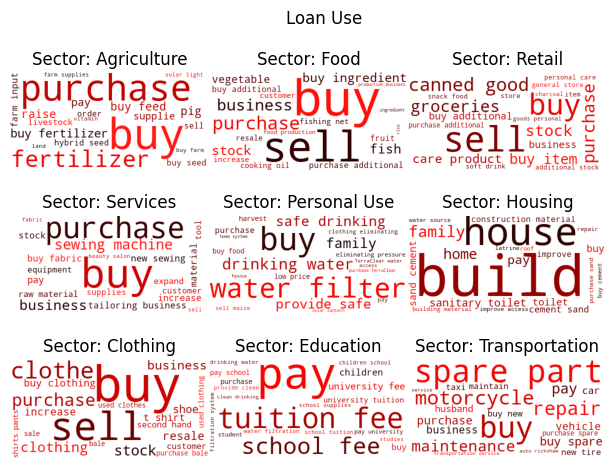

<Figure size 2400x3000 with 0 Axes>

In [28]:
generate_subplot(331, "Agriculture")
generate_subplot(332, "Food")
generate_subplot(333, "Retail")
generate_subplot(334, "Services")
generate_subplot(335, "Personal Use")
generate_subplot(336, "Housing")
generate_subplot(337, "Clothing")
generate_subplot(338, "Education")
generate_subplot(339, "Transportation")
                 

plt.suptitle("Loan Use")
plt.tight_layout(pad=0.4, w_pad=0.0, h_pad=2.0, rect=[0, 0, 0.95, 0.95])
plt.figure(figsize=(24, 30))

In [29]:
df = loan_mpi_df.groupby(["world_region", "sector"])["loan_amount"].agg(["count", "sum"]).reset_index()
df2 = loan_mpi_df.groupby(["world_region", "sector"])["MPI"].agg("mean").reset_index()
df = df.merge(df2)
df.columns = ["World Region","Sector", "Number of loans", "Amount of loans", "Average MPI"]
fig = px.scatter(df, x='Number of loans', y='Average MPI', color='World Region', size='Amount of loans', size_max=50, 
                 hover_name='Sector',
                 title="Average MPI vs. number, amount of loans, grouped by World region and Sector")
fig.show() 

In [30]:
df = loan_mpi_df.groupby(["sector", "activity"])["loan_amount"].agg(["count", "sum"]).reset_index()
df2 = loan_mpi_df.groupby(["sector", "activity"])["MPI"].agg("mean").reset_index()
df = df.merge(df2)
df.columns = ["Sector", "Activity", "Number of loans", "Amount of loans", "Average MPI"]
fig = px.scatter(df, x='Number of loans', y='Average MPI', color='Sector', size='Amount of loans', size_max=50, 
                 hover_name='Activity',
                 title="Average MPI vs. number, amount of loans, grouped by Sector and Activity")
fig.show() 

In [31]:
df = loan_mpi_df.groupby(["borrower_gen", "repayment_interval"])["loan_amount"].agg(["count", "sum"]).reset_index()
df2 = loan_mpi_df.groupby(["borrower_gen", "repayment_interval"])["MPI"].agg("mean").reset_index()
df = df.merge(df2)
df.columns = ["Borrower gender", "Repayment Interval", "Number of loans", "Amount of loans", "Average MPI"]
fig = px.scatter(df, x='Number of loans', y='Average MPI', color='Borrower gender', size='Amount of loans', size_max=50, 
                 hover_name='Repayment Interval',range_color=cmap_custom, 
                 title="Average MPI vs. number, amount of loans, grouped by Borrower gender and repayment interval")
fig.show() 

Let's look to a correlation matrix of various features in Kiva loans dataset and MPI dataset.

Text(0.5, 1.0, 'Kiva Loan Feature Correlation')

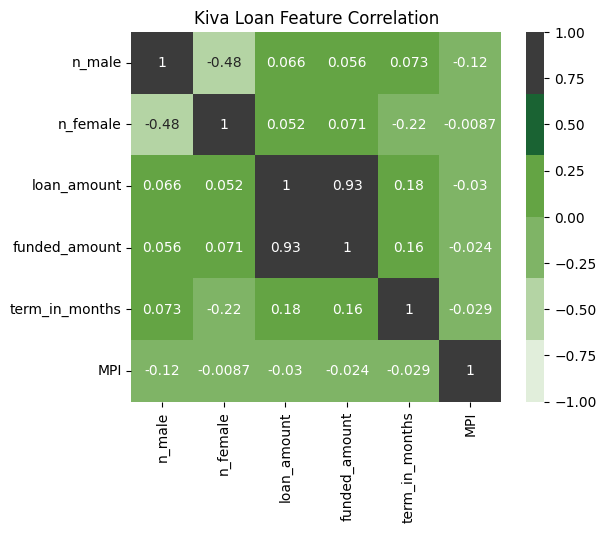

In [32]:
kiva_loans_corr = loan_mpi_df.loc[loan_mpi_df.currency=="USD"][['n_male', 'n_female','loan_amount', 
                                                                'funded_amount', 'term_in_months', 
                                                                'repayment_interval', 'MPI']].corr()

sns.heatmap(kiva_loans_corr, 
            xticklabels=kiva_loans_corr.columns.values,
            yticklabels=kiva_loans_corr.columns.values, 
            cmap=cmap_custom, vmin=-1, vmax=1, annot=True, square=True)
plt.title('Kiva Loan Feature Correlation')

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="6"></a> <font color="#64a444">Looking to poverty from more than one angle</font>


Let's merge the UN Data with Kiva loans and Kiva MPI data.

In [33]:
kiva_mpi_un_df = loan_mpi_df.merge(kiva_country_profiles_variables_df)

In [34]:
sel_columns = ['n_male', 'n_female','loan_amount', 'funded_amount', 'term_in_months','repayment_interval', 'MPI',
               'Surface area (km2)', 'Population in thousands (2017)', 
               'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
               'GDP: Gross domestic product (million current US$)',
               'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
        'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
        'Urban population (% of total population)',
       'Urban population growth rate (average annual %)',
       'Fertility rate, total (live births per woman)',
       'Life expectancy at birth (females/males, years)',
               'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure (% of GDP)',
       'Health: Physicians (per 1000 pop.)',
       'Education: Government expenditure (% of GDP)',
              'Seats held by women in national parliaments %',
        'Energy production, primary (Petajoules)',
       'Energy supply per capita (Gigajoules)',
       'Pop. using improved drinking water (urban/rural, %)',
       'Pop. using improved sanitation facilities (urban/rural, %)']
       

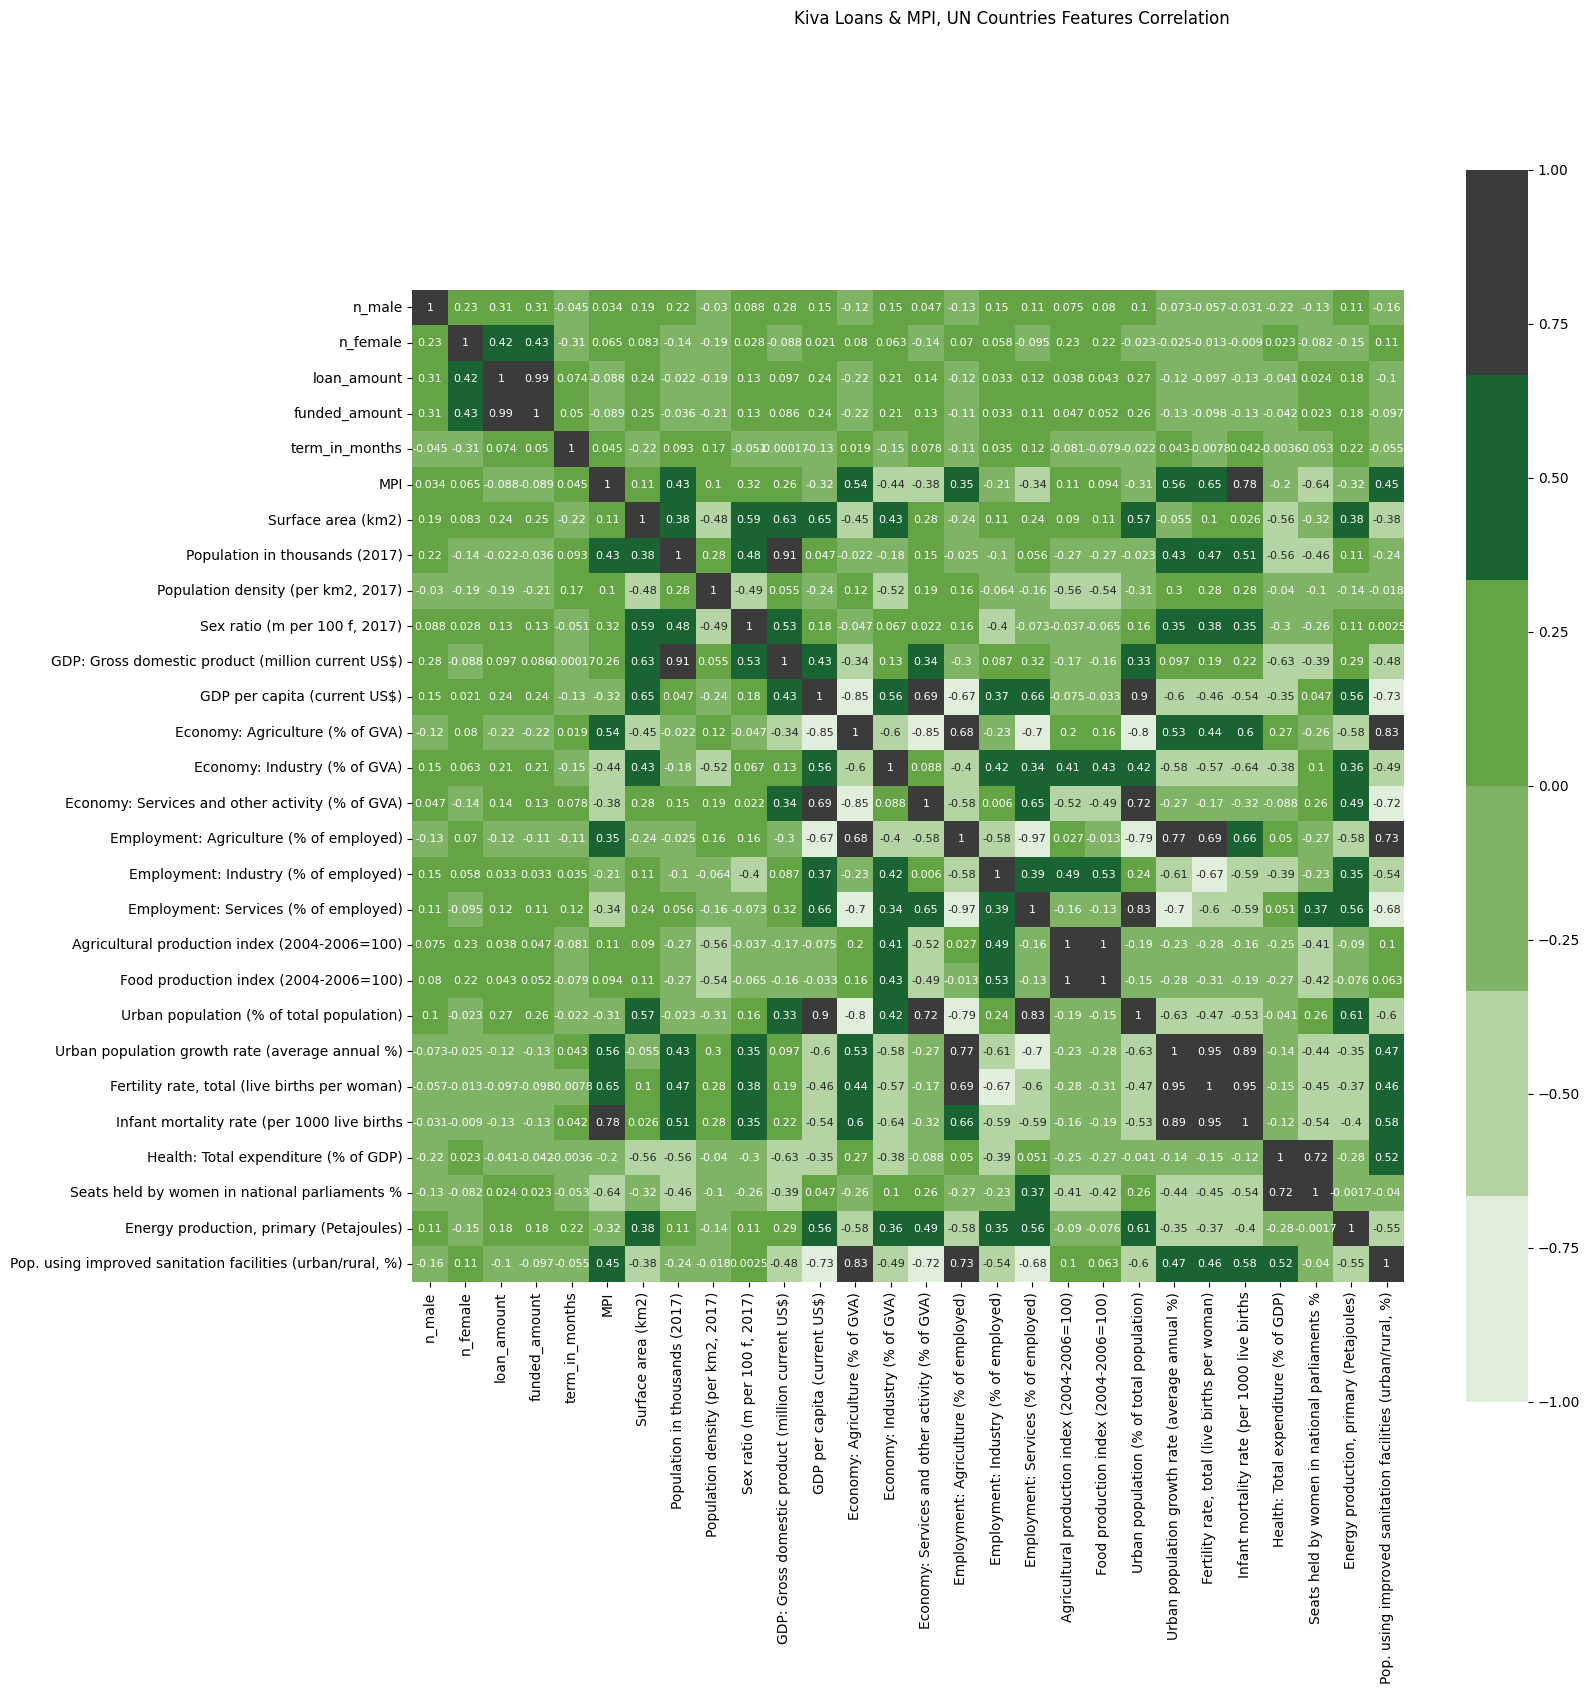

In [35]:
kiva_loans_corr = kiva_mpi_un_df.loc[loan_mpi_df.currency=="USD"][sel_columns].corr()

fig, ax = plt.subplots(1, 1, figsize = (16, 16))
sns.heatmap(kiva_loans_corr, 
            xticklabels=kiva_loans_corr.columns.values,
            yticklabels=kiva_loans_corr.columns.values, 
            cmap=cmap_custom, vmin=-1, vmax=1, annot=True, square=True,
            annot_kws={"size":8})
plt.suptitle('Kiva Loans & MPI, UN Countries Features Correlation')
plt.show()

In [36]:
kiva_country_profiles_variables_df.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [37]:
region_df = kiva_mpi_region_locations_df.loc[~kiva_mpi_region_locations_df.MPI.isna()]
df = region_df.groupby(["country"])["MPI"].agg(["mean", "median"]).reset_index()
df.columns = ["country", "MPI_mean", "MPI_median"]
kiva_mpi_country_df = kiva_country_profiles_variables_df.merge(df)
df = kiva_mpi_country_df.sort_values(by="MPI_median", ascending = False)[0:10]
df['MPI_median'] = df['MPI_median'] * 100
df['MPI_mean'] = df['MPI_mean'] * 100
df['Infant mortality rate /1000 births'] = df['Infant mortality rate (per 1000 live births']
df["Employment: Agriculture %"] = df['Employment: Agriculture (% of employed)'].apply(lambda x: abs(x))
df["No improved sanitation facilit. %"] = df['Pop. using improved sanitation facilities (urban/rural, %)'].apply(lambda x: 100 - float(x))
df ['No improved drinking water % (U)'] = df['Pop. using improved drinking water (urban/rural, %)'].apply(lambda x: 100 - float(x.split("/")[0]))
df ['No improved drinking water % (R)'] = df['Pop. using improved drinking water (urban/rural, %)'].apply(lambda x: 100 - float(x.split("/")[1]))
radar_columns = ["No improved sanitation facilit. %",
                 "MPI_median", "MPI_mean",
                 'No improved drinking water % (U)',
                 'No improved drinking water % (R)',
                 'Infant mortality rate /1000 births',
                 "Employment: Agriculture %"
              ]

In [38]:
fig = make_subplots(rows=1, shared_xaxes=True)

for _, row in df.iterrows():
    r = []
    for f in radar_columns:
        r.append(row[f])
    radar = go.Scatterpolar(r=r,
       theta=radar_columns,                      
       fill = 'toself',
       opacity=0.7,
       name = row['country'])
    fig.add_trace(radar)
fig.update_layout(height=900, width=900,
        title="Selcted poverty dimmensions in the 10 countries with highest median MPI rate",
        polar=dict(
            radialaxis=dict(visible=True, range=[0,100], gridcolor='black'),
            bgcolor='white',
            angularaxis=dict(visible=True, linecolor='black', gridcolor='black')
        ),
        margin=go.layout.Margin(l=200,r=200,b=50, t=100)
    )
fig.show()

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="7"></a><font color="#64a444">What Kiva can improve?</font> 




Kiva can improve by targeting with priority the countries, regions and categories that are most exposed to the different aspects that characterises the poverty. Using the radar chart can be a very useful tool, since we selected those metrics or modified some of them to have a higher total area with higher poverty. GDP per capita is not the only metric that characterize poverty. 

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="8"></a><font color="#64a444">Final remarks</font>



Majority of loans are with female-only borrowers (many of them with multiple borrowers), then, on second place, the loans with male-only borrowers. Majority of loans have monthly repayments. Bullet repayments are mostly for agriculture. We could observe that the countries with large values of MPI show not only a small value of GDP per capita but also a large weight of Agriculture in the GDP, have low life expectancy at birth, poor medical services and lower access to water and sanitation services.

Poverty is not only about GDP per capita, is about a multitude (a combination) of factors and support for Kiva borrowers can and should address some of these factors to ensure relief from poverty.

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>

# <a id="9"></a><font color="#64a444">References</font>  

[1] Kiva, https://www.kaggle.com/kiva  

[2] Data Science for Good: Kiva Crowdfunding, Kaggle Dataset, https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding  

[3] UN Data country profiles, Kaggle Dataset, https://www.kaggle.com/sudalairajkumar/undata-country-profiles  

[4] Multidimensional poverty index (MPI), http://hdr.undp.org/en/content/multidimensional-poverty-index-mpi  

[5] Multidimensional poverty index, Wikipedia, https://en.wikipedia.org/wiki/Multidimensional_Poverty_Index  

[6] Kiva: Loans that change lives, https://theglobalheroes.wordpress.com/2012/11/01/kiva-loans-that-change-lives/  

---
<div style="float: right;">
        <a href="#0" class="button btn-success btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="Go to Top">Go to Top</a>
</div>